In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

In [2]:
df = pd.read_excel('USA.xlsx',
                    sheet_name='USA by Place of birth',
                    skiprows=range(20),
                    skipfooter=2)

In [3]:
# in pandas axis=0 represents rows (default) and axis=1 represents columns.
df.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Less developed regions,722,1881,1569,2566,3222,2794,...,2137,4749,3417,1753,2813,3165,2017,1648,1617,2196
1,Albania,Europe,Southern Europe,More developed regions,30,11,23,22,32,45,...,3840,5947,7914,5737,5754,5137,4711,3612,3364,3186
2,Algeria,Africa,Northern Africa,Less developed regions,175,184,190,201,197,202,...,805,1115,1300,1036,1037,1485,1305,1364,1369,1241
3,American Samoa,Oceania,Polynesia,Less developed regions,0,0,7,7,0,0,...,12,15,28,11,14,19,14,D,-,D
4,Andorra,Europe,Southern Europe,More developed regions,2,3,2,1,0,0,...,..,..,..,..,..,..,..,..,..,..


In [4]:
df.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

In [5]:
df.set_index('Country', inplace=True)

In [6]:
remove = ['..', 'D', '-']
df.replace(remove, np.nan, inplace=True)

colnames = df.select_dtypes(include=[np.number]).columns.tolist()
for col in colnames:
    df[col] = df[col].fillna(0.0).astype(int)

# let's view the first five elements and see how the dataframe was changed
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Less developed regions,722,1881,1569,2566,3222,2794,2831,...,2137,4749,3417,1753,2813,3165,2017,1648,1617,2196
Albania,Europe,Southern Europe,More developed regions,30,11,23,22,32,45,53,...,3840,5947,7914,5737,5754,5137,4711,3612,3364,3186
Algeria,Africa,Northern Africa,Less developed regions,175,184,190,201,197,202,183,...,805,1115,1300,1036,1037,1485,1305,1364,1369,1241
American Samoa,Oceania,Polynesia,Less developed regions,0,0,7,7,0,0,0,...,12,15,28,11,14,19,14,0,0,0
Andorra,Europe,Southern Europe,More developed regions,2,3,2,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df['Total'] = df.sum(axis=1)
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Less developed regions,722,1881,1569,2566,3222,2794,2831,...,4749,3417,1753,2813,3165,2017,1648,1617,2196,74430
Albania,Europe,Southern Europe,More developed regions,30,11,23,22,32,45,53,...,5947,7914,5737,5754,5137,4711,3612,3364,3186,87380
Algeria,Africa,Northern Africa,Less developed regions,175,184,190,201,197,202,183,...,1115,1300,1036,1037,1485,1305,1364,1369,1241,23281
American Samoa,Oceania,Polynesia,Less developed regions,0,0,7,7,0,0,0,...,15,28,11,14,19,14,0,0,0,220
Andorra,Europe,Southern Europe,More developed regions,2,3,2,1,0,0,1,...,0,0,0,0,0,0,0,0,0,18


## Jawaban 1

In [8]:
df.loc['Mexico', 2010]

139120

In [9]:
df.loc['Mexico', range(2005, 2010)]

2005    161445
2006    173749
2007    148640
2008    189989
2009    164920
Name: Mexico, dtype: object

## Jawaban 2

In [10]:
df[(df['Continent'] == 'Latin America and the Caribbean') & (df['Region']=='South America')]

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Argentina,Latin America and the Caribbean,South America,Less developed regions,2815,2236,2065,2029,2141,1844,2187,...,7081,7327,5645,5353,5780,4399,4473,4359,4372,116501
Bolivia (Plurinational State of),Latin America and the Caribbean,South America,Less developed regions,730,820,750,823,918,1006,1079,...,2197,4025,2590,2436,2837,2253,2173,1948,2071,59295
Brazil,Latin America and the Caribbean,South America,Less developed regions,1570,1616,1475,1503,1847,2272,2332,...,16662,17903,14295,12195,14701,12258,11763,11441,11033,235580
Chile,Latin America and the Caribbean,South America,Less developed regions,2569,2048,1911,1970,1912,1992,2243,...,2404,2774,2274,2017,2250,1950,1853,1673,1736,68711
Colombia,Latin America and the Caribbean,South America,Less developed regions,11289,10335,8608,9658,11020,11982,11408,...,25566,43144,33187,30213,27849,22406,22635,20931,21131,582569
Ecuador,Latin America and the Caribbean,South America,Less developed regions,6133,5129,4127,4243,4164,4482,4516,...,11608,17489,12248,11663,12128,11492,11103,9342,10591,282086
Falkland Islands (Malvinas),Latin America and the Caribbean,South America,Less developed regions,3,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,7
French Guiana,Latin America and the Caribbean,South America,Less developed regions,14,7,5,5,1,0,1,...,8,15,9,6,18,9,0,0,0,168
Guyana,Latin America and the Caribbean,South America,Less developed regions,8381,6743,10059,8980,8412,8531,10367,...,9317,9552,5726,6823,6670,6749,6599,5683,5897,271997


## Jawaban 3

In [11]:
# we are using the inline backend
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

In [16]:
df.columns = list(map(str, df.columns))
# let's examine the types of the column labels
all(isinstance(column, str) for column in df.columns)

True

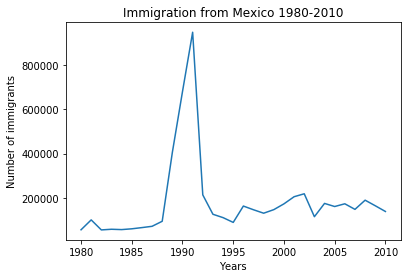

In [17]:
years = list(map(str, range(1980, 2011)))

mexico = df.loc['Mexico', years]
mexico.index = mexico.index.map(int) # let's change the index values of Haiti to type integer for plotting
mexico.plot(kind='line')

plt.title('Immigration from Mexico 1980-2010')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.show() # need this line to show the updates made to the figure

## Jawaban 4

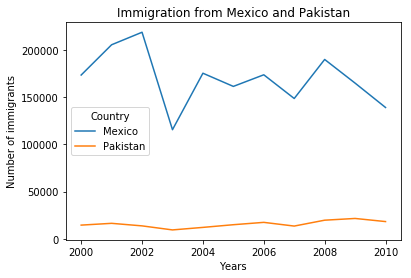

In [18]:
years = list(map(str, range(2000, 2011)))

df_MP = df.loc[['Mexico', 'Pakistan'], years]
df_MP = df_MP.transpose()
df_MP.index = df_MP.index.map(int) 
df_MP.plot(kind='line')

plt.title('Immigration from Mexico and Pakistan')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.show() # need this line to show the updates made to the figure

## Jawaban 5

In [19]:
df.columns = list(map(str, df.columns))
# let's examine the types of the column labels
all(isinstance(column, str) for column in df.columns)

True

In [20]:
years = list(map(str, range(1980, 2011)))

In [21]:
df.sort_values(['Total'], ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top5 = df.head()

# transpose the dataframe
df_top5 = df_top5[years].transpose() 

df_top5.head()

Country,Mexico,Philippines,China,India,Viet Nam
1980,56680,42316,27651,22607,43483
1981,101268,43772,25803,21522,55631
1982,56106,45102,27100,21738,72553
1983,59079,41546,25777,25451,37560
1984,57557,42768,23363,24964,37236


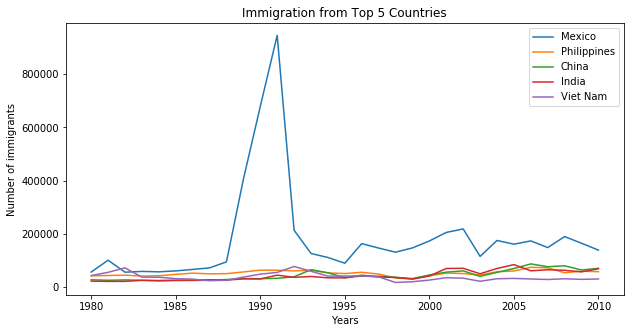

In [22]:
df_top5.index = df_top5.index.map(int) 
df_top5.plot(kind='line', figsize=(10,5))

plt.title('Immigration from Top 5 Countries')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')
plt.legend()
plt.show() # need this line to show the updates made to the figure

## Jawaban 6

In [23]:
# get the bottom 5 entries
df_bottom5 = df.tail()

# transpose the dataframe
df_bottom5 = df_bottom5[years].transpose() 

df_bottom5.head()

Country,Saint Pierre and Miquelon,Niue,Falkland Islands (Malvinas),Réunion,Western Sahara
1980,6,0,3,0,0
1981,4,0,2,1,1
1982,0,1,0,1,1
1983,1,8,0,2,2
1984,1,0,1,0,0


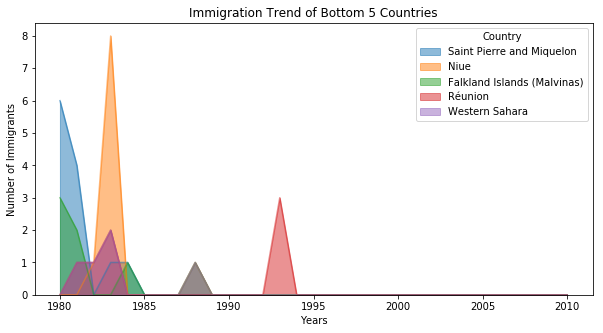

In [24]:
df_bottom5.index = df_bottom5.index.map(int) 
df_bottom5.plot(kind='area', 
             stacked=False,
             figsize=(10, 5), # pass a tuple (x, y) size
             )

plt.title('Immigration Trend of Bottom 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

## Jawaban 7

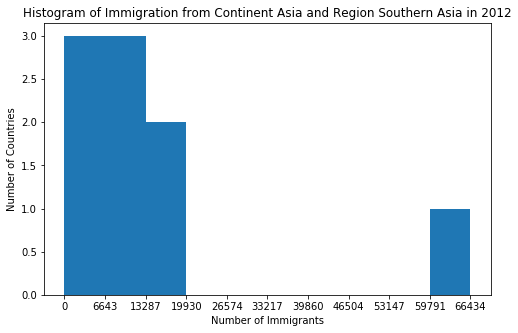

In [25]:
df_AS = df[(df['Continent'] == 'Asia') & (df['Region']=='Southern Asia')]
# np.histogram returns 2 values
count, bin_edges = np.histogram(df_AS['2012'])
df_AS['2012'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of Immigration from Continent Asia and Region Southern Asia in 2012') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label

plt.show()

## Jawaban 8

In [26]:
# group countries by continents and apply sum() function 
df_continents = df.groupby('Continent', axis=0).sum()

# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
print(type(df.groupby('Continent', axis=0)))

df_continents.head(10)

<class 'pandas.core.groupby.groupby.DataFrameGroupBy'>


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,13813,14846,14098,14858,15334,16875,17268,17537,18680,24917,...,85077,117403,94695,105903,127039,101351,100374,107221,98245,1749673
Asia,235826,263980,303467,261218,243915,249919,254900,245711,254646,298160,...,402526,432247,388844,389950,405273,415326,445436,424263,395156,10763387
Europe,58428,54631,51075,50865,55073,56512,56659,55498,58315,68133,...,155995,132617,96885,94325,95444,80451,77618,78630,83719,3148363
Latin America and the Caribbean,190193,234519,182121,192692,193037,209465,238128,248693,278889,653649,...,426396,533256,430012,476310,461582,410106,406770,393767,382882,13479948
Northern America,14023,11557,11127,11695,10950,11535,11212,12031,11950,12441,...,22177,18700,15774,15417,16429,13601,13140,13296,13588,485189
Oceania,3759,4049,3708,3408,3648,3908,3753,3873,3773,4353,...,6521,7365,6085,5249,5563,5337,4962,4725,5265,165087


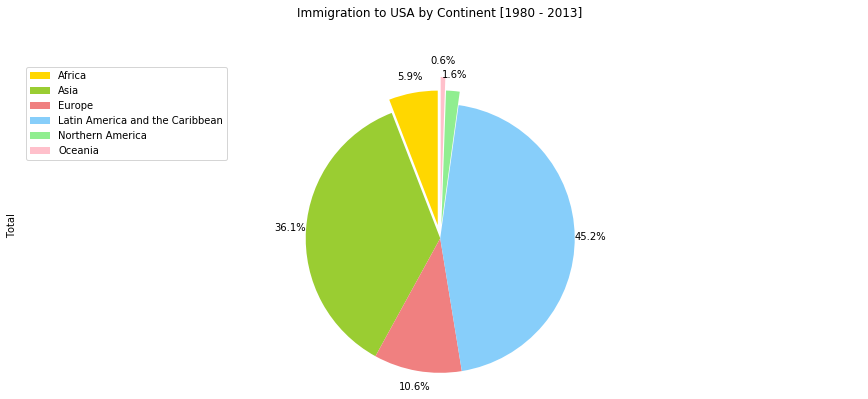

In [44]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.2] # ratio for each continent with which to offset each wedge.

df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=False,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to USA by Continent [1980 - 2013]', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()

## Jawaban 9 

In [34]:
df_IJ= df.loc[['India', 'Japan'], years].transpose()
df_IJ.head()

Country,India,Japan
1980,22607,4225
1981,21522,3896
1982,21738,3903
1983,25451,4092
1984,24964,4043


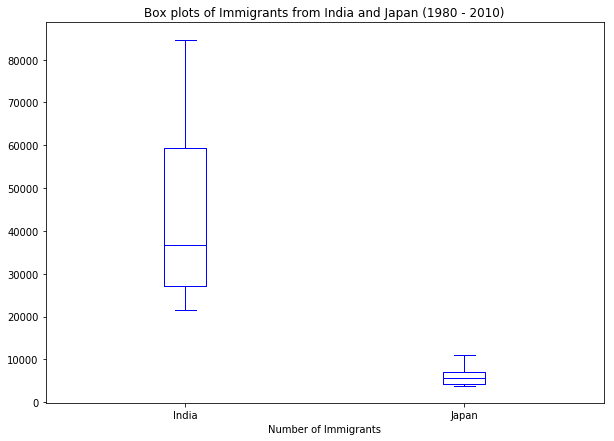

In [43]:
df_IJ.plot(kind='box', figsize=(10, 7), color='blue', vert=True)
plt.title('Box plots of Immigrants from India and Japan (1980 - 2010)')
plt.xlabel('Number of Immigrants')
plt.show()

In [30]:
df_IJ.describe()

Country,India,Japan
count,31.000000,31.000000
mean,42899.064516,5965.032258
std,18192.174306,1881.107023
min,21522.000000,3896.000000
25%,27035.500000,4213.500000
50%,36755.000000,5734.000000
75%,59336.500000,6978.500000
max,84680.000000,11028.000000


In [29]:
df_IJ.min()

Country
India    21522
Japan     3896
dtype: int32

In [30]:
df_IJ.max()

Country
India    84680
Japan    11028
dtype: int32

In [31]:
df_IJ.median()

Country
India    36755.0
Japan     5734.0
dtype: float64

## Jawaban 10

In [35]:
years = list(map(str, range(1980, 2014)))

In [36]:
df_IM= df.loc[['India', 'Mexico'], years].transpose()
df_IM.head()

Country,India,Mexico
1980,22607,56680
1981,21522,101268
1982,21738,56106
1983,25451,59079
1984,24964,57557


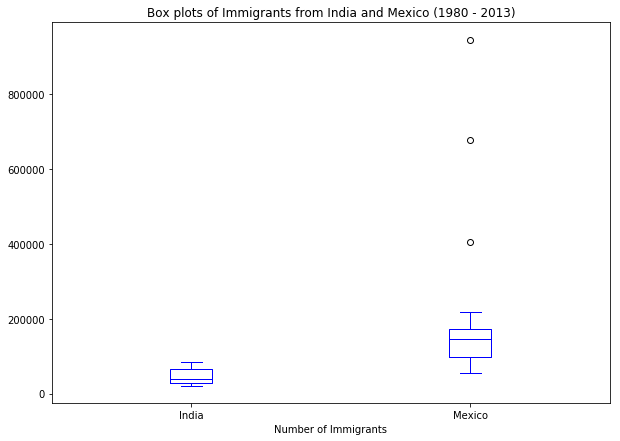

In [40]:
df_IM.plot(kind='box', figsize=(10, 7), color='blue', vert=True)
plt.title('Box plots of Immigrants from India and Mexico (1980 - 2013)')
plt.xlabel('Number of Immigrants')
plt.show()

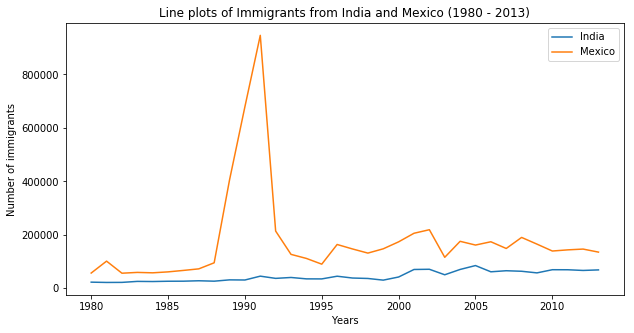

In [41]:
df_IM.index = df_IM.index.map(int) # let's change the index values of Haiti to type integer for plotting
df_IM.plot(kind='line', figsize=(10,5))

plt.title('Line plots of Immigrants from India and Mexico (1980 - 2013)')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')
plt.legend()
plt.show() 